## Title: DSC550 Final: Milestone2
## Date: July 24, 2022
## Author: Anjani Bonda

There are a quite a number of unwanted columns from the original dataset. The columns being dropped are: image url, the url to the review, the price purchased, the name of the reviewer and other review from a duplicate rating, because they are not really required for sentiment analysis.

In addition, I have removed the brand and reviews category because the brand is the same for all rows, and the reviews doesn't give credence to the credibility of the review.

Post the creation of categorical columns through get_dummies function, any values that are strings or text-based have been deleted because their usefulness have been extracted and dropping these columns would give clarity.

More visualizations have been created such as time series analysis, histograms, correlation maps, and linear regression. Coefficients have also been determined and calculated.

In [1]:
# Load required packages
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
import numpy as np
import networkx as nx
import pandas as pd
import re
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import string
from textblob import TextBlob
from yellowbrick.features import Rank2D

In [2]:
# Load the dataframe from Milestone 1.
pd.set_option('display.max_colwidth', None)
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')
AP = items['title'].str.lower().str.find('iphone x')!=-1
items_df = items.loc[AP]
apple_reviews = pd.merge(items_df,reviews, on='asin')
apple_reviews = apple_reviews.dropna()
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date'])
del apple_reviews['Brand']
del apple_reviews['Review Title']
del apple_reviews['Reviews']
del apple_reviews['Helpful']
del apple_reviews['Verified']
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              The screen was cracked and the phone did not turn in after 24 hours of charging.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               It is not a Refurbished iphone, it is activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            I bought this phone and this is my

In [3]:
# Sentiment Analysis:
# change to lower case.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              the screen was cracked and the phone did not turn in after 24 hours of charging.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               it is not a refurbished iphone, it is activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            i bought this phone and this is my

In [4]:
#Removing punctuation.
apple_reviews['Review'] = apple_reviews['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            the screen was cracked and the phone did not turn in after 24 hours of charging   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              it is not a refurbished iphone it is activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i bought this phone and this is my first picture with the back camera and also when im tapping look like multitouch there is any possibility to change the phone   
3    

In [5]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          screen cracked phone turn 24 hours charging  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         refurbished iphone activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                 bought phone first picture back camera also im tapping look like multitouch possibility change phone  
3                                                                                                                                                                                                                                                                                                                                                                               product falsely labeled unlocked 4 weeks since informed phone still locked get excuses plus phone came really bad condition many scratches see clearly  
4  purchased refurbished iphone x arrived time came clean charger excited phone phone stolen 3 months ago got job saved able afford new one tried set service total wireless phone kept repeating message sim card compatible bought another sim card service plan mobile got thing went apple next day try see anything wrong phone turns nothing wrong phone phone already another service plan even payed wasting 10 hours time spending 60 besides 690 phone price trying set stupid phone service plan would review 0 stars could

In [6]:
#Word tokenizing
apple_reviews['Review'] = apple_reviews['Review'].apply(word_tokenize) 
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [screen, cracked, phone, turn, 24, hours, charging]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [refurbished, iphone, activated]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [bought, phone, first, picture, back, camera, also, im, tapping, look, like, multitouch, possibility, change, phone]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                             [product, falsely, labeled, unlocked, 4, weeks, since, informed, phone, still, locked, get, excuses, plus, phone, came, really, bad, condition, many, scratches, see, clearly]  
4  [purchased, refurbished, iphone, x, arrived, time, came, clean, charger, excited, phone, phone, stolen, 3, months, ago, got, job, saved, able, afford, new, one, tried, set, service, total, wireless, phone, kept, repeating, message, sim, card, compatible, bought, another, sim, card, service, pla

In [7]:
#word stemming
stemmer = PorterStemmer()
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                          screen crack phone turn 24 hour charg  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                          refurbish iphon activ  
2                                                                                                                                                                                                                                                                                                                                                                                     bought phone first pictur back camera also im tap look like multitouch possibl chang phone  
3                                                                                                                                                                                                                                                                                                                                              product fals label unlock 4 week sinc inform phone still lock get excus plu phone came realli bad condit mani scratch see clearli  
4  purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could

In [8]:
#List of keywords people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']

In [9]:
#Searching all rows for items in the lists.
batt = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Screen))]

In [10]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In [11]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Topic'] = 'Battery'
batt.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1898463897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Score'] = batt['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1898463897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1898463897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Item #                                                          Model  \
4   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
5   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
17  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
19  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
4   749.99       1 2019-04-16   
5   749.99       5 2018-12-12   
8   749.99       1 2019-04-08   
17  749.99       2 2019-01-02   
19  749.99       5 2019-11-08   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  \
4                                                                                                                                                                 purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           love new phone look work everyth work batteri life 94 good glad purchas definit recommend buy skeptic buy product definit worth buy look good phone   
8                                                                                                                                                                                                                                                                                                                                              phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
17                                                                                                                                                                                                                                                                                                                                                                                                                                  got phone came sketchi box charger paper funki wrap around got bare charg charg setup got halfway threw set turn black said hot function defiantli hot disappoint set nice phone get repetit problem refund   
19  phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review mention turn camera click problem issu get set servic provid 

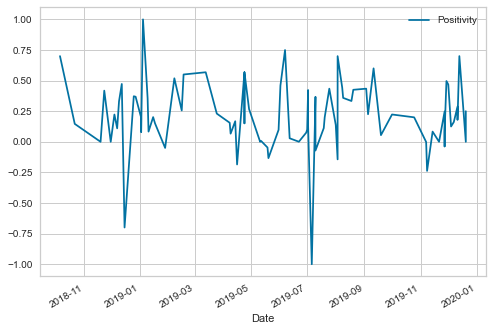

In [12]:
#Time series
batt_ts = batt.plot(x='Date', y='Positivity')

In [13]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.30711426082030036
Probability is:
0.0002910619926631075


<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

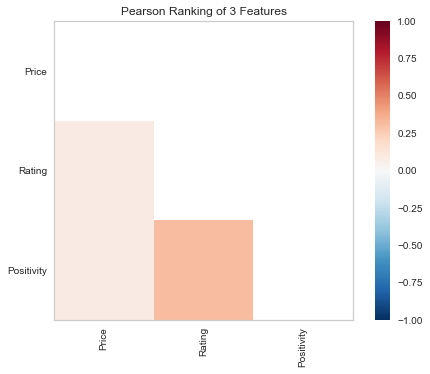

In [15]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = batt[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/batt.png") # Draw/show/poof the data

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/40087000.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


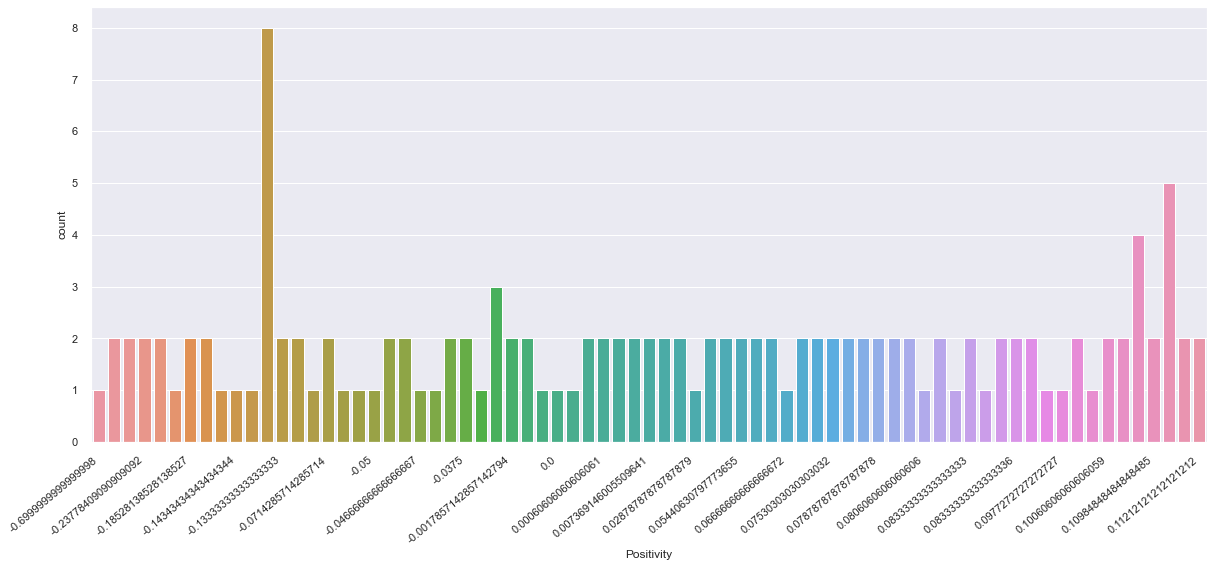

In [16]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [17]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Topic'] = 'Camera'
came.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/2628013651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  came['Score'] = came['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/2628013651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  came['Positivity'] = came['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/2628013651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Item #                                                          Model  \
2   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
19  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
20  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
24  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
2   749.99       1 2019-04-20   
8   749.99       1 2019-04-08   
19  749.99       5 2019-11-08   
20  749.99       3 2019-07-25   
24  749.99       1 2019-06-19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   bought phone first pictur back camera also im tap look like multitouch possibl chang phone   
8                                                                                                                                                                                                                                                                                                                                                                                                             phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
19                                                                 phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review mention turn camera click problem issu get set servic provid sprint consid buy phone base review consid thing hundr dollar cheaper buy one new amazon return servic impecc worst come worst return get anoth one also consid fact averag roughli 10 peopl even bother write amazon review major peopl leav 1 star review probabl written review everyth check like phone almost forgot write review consid fact major review gave phone 5 star begin see interest save money excel rout like go much better money   
20  phone arriv right time great condit charger includ work great howev think phone must korea japan appar illeg take digit photo without audibl shutter click absolut way turn sound even phone mute volum turn way happen everi major applic use camera art student take ton pictur camera primari reason got iphon x took multipl store told either return phone jailbreak rewrit line code affect featur jailbreak void warranti servic appl offer return big hiccup work around take pictur wed librari quiet set ideal make sure countri origin taken consider sell someon p

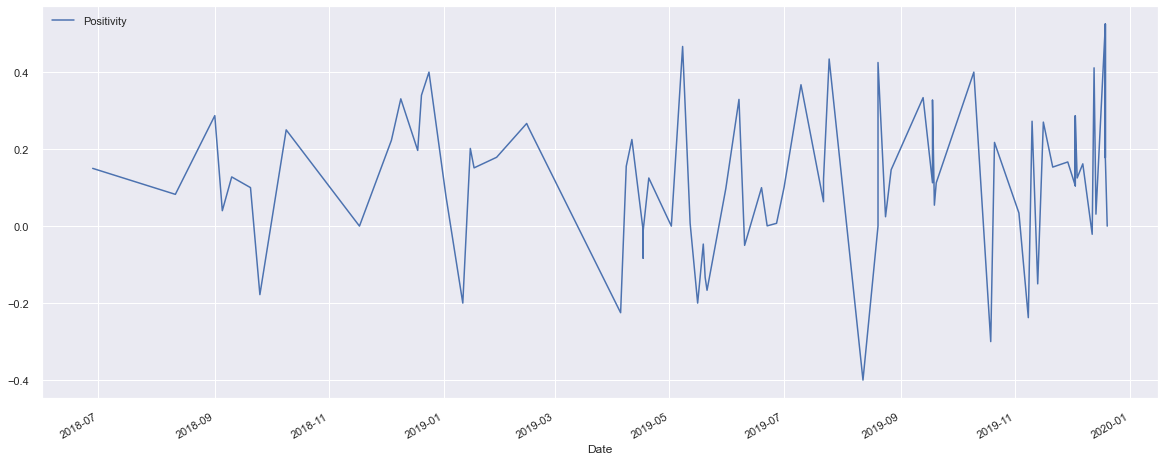

In [18]:
#Time series.
came_ts = came.plot(x='Date', y='Positivity')

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

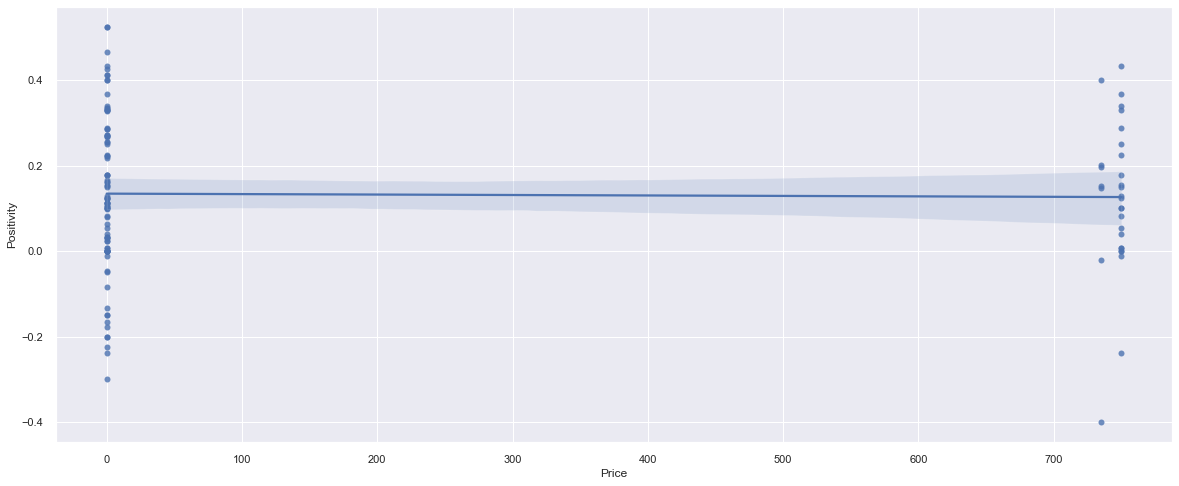

In [19]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=came)

<AxesSubplot:xlabel='Rating', ylabel='Positivity'>

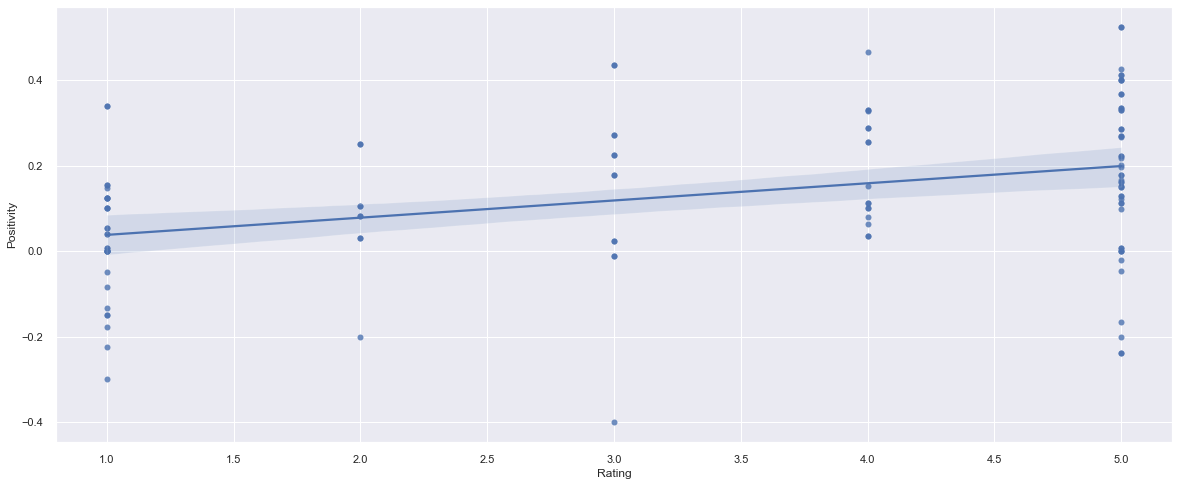

In [20]:
#Linear regression
sns.regplot(x='Rating',y="Positivity",data=came)

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/2085259298.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


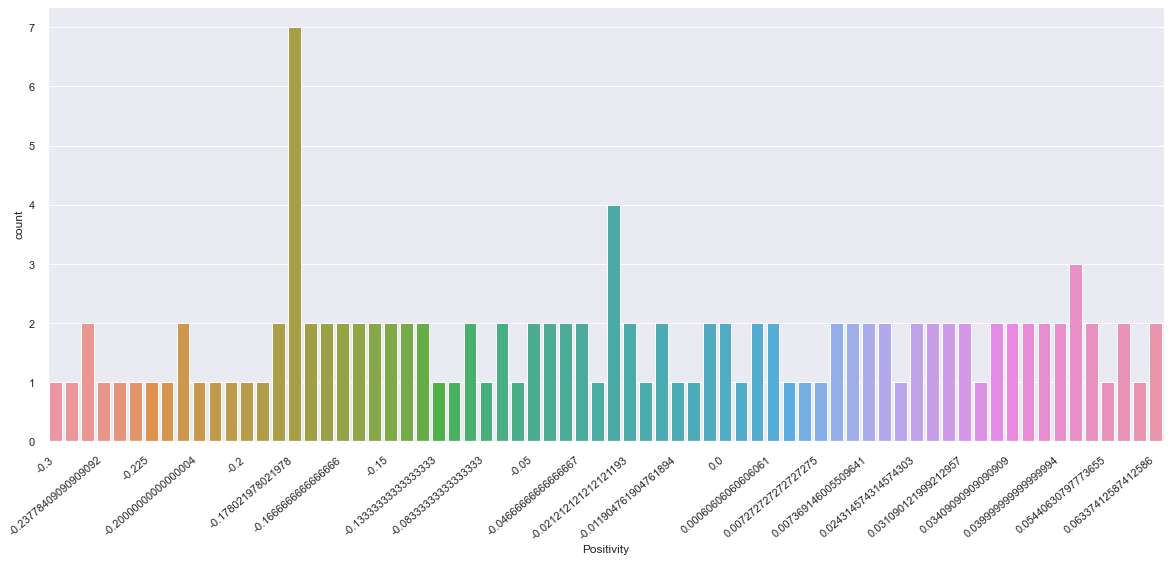

In [21]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

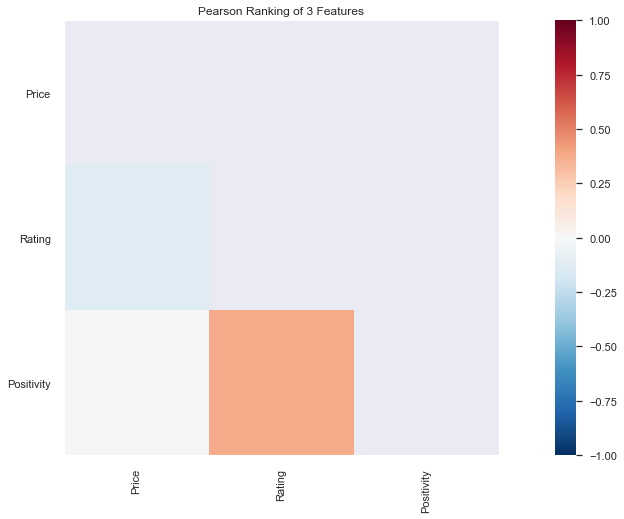

In [22]:
num_features = ['Price', 'Rating', 'Positivity']
X = came[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/came.png") # Draw/show/poof the data

In [23]:
#R2 info.
r, p = scipy.stats.pearsonr(came['Rating'],came['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)


R is: 
0.3750723395047132
Probability is:
2.433731176041164e-05


In [24]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Topic'] = 'Speed'
spee.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1344785708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spee['Score'] = spee['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1344785708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1344785708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Item #                                                          Model  \
7   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
22  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
23  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
24  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
25  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
7   749.99       5 2018-10-23   
22  749.99       5 2019-01-09   
23  749.99       5 2019-07-02   
24  749.99       1 2019-06-19   
25  749.99       1 2019-09-19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Review  \
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         phone basic new everyth work scratch anyth fast deliveri satisfi   
22                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

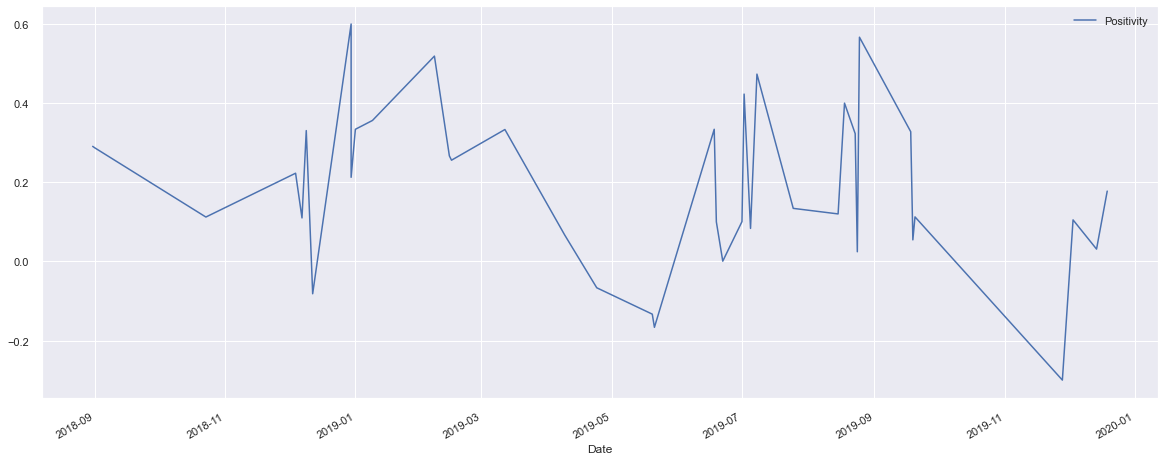

In [25]:
#Time series.
spee_ts = spee.plot(x='Date', y='Positivity')

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/40087000.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


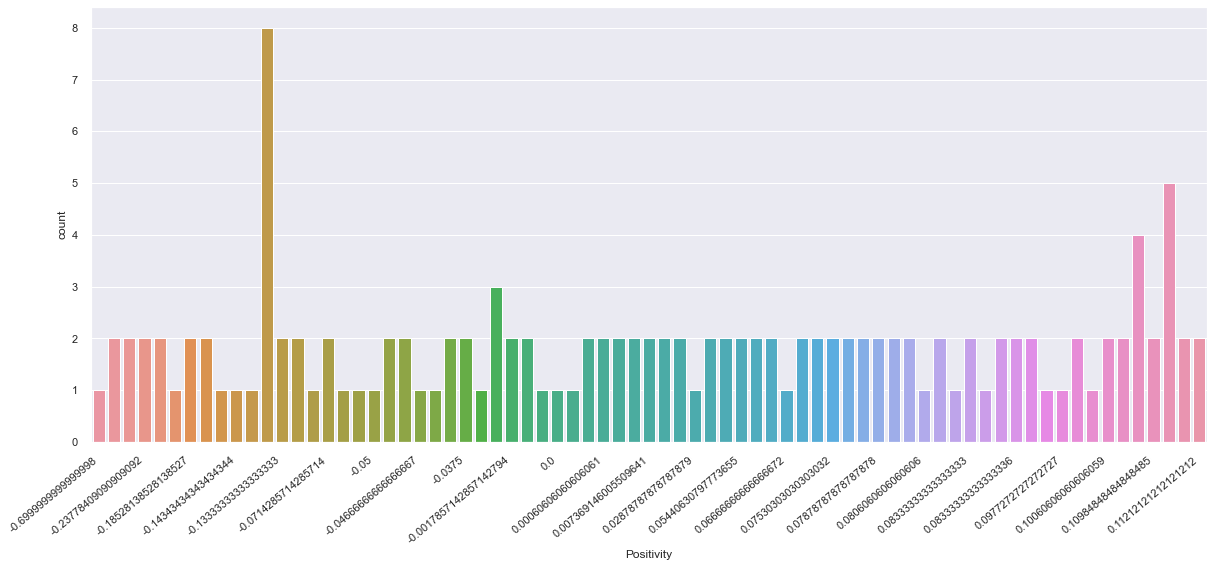

In [26]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

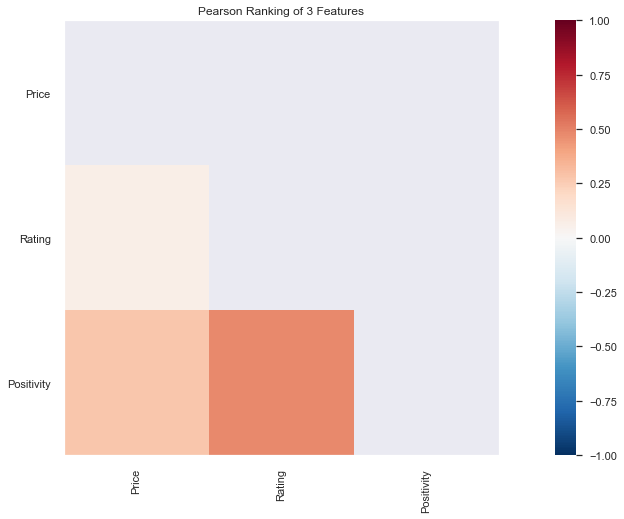

In [27]:
#Correlation map.
num_features = ['Price', 'Rating', 'Positivity']
X = spee[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/spee.png") # Draw/show/poof the data

In [28]:
#R2 info
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.47961296133796144
Probability is:
4.609315423501099e-05


In [29]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Topic'] = 'Storage'
stor.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/3312934627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stor['Score'] = stor['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/3312934627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/3312934627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Item #  \
55   B0775451TT   
77   B0775451TT   
90   B0775451TT   
274  B0775451TT   
291  B0775451TT   

                                                             Model   Price  \
55   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
77   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
90   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
274  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
291  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   

     Rating       Date  \
55        5 2019-06-13   
77        4 2019-12-11   
90        5 2019-04-23   
274       5 2018-09-21   
291       1 2019-01-06   

                                                                                                                                                                                                                                               Review  \
55   love took 3 day get phone perfect condit almost brand new come screen protector like refurbish phone worri bought one came half way charg great regard setup speaker work receiv correct phone 256gb fulli unlock amaz phone definit worth price   
77                                              order 256 gb product came minor scuff side phone easili cover cheap case imei clean slid sim card old iphon get signal batteri life 85 solid 8 10 qualiti well worth discount buy new updat issu aris   
90                                                              phone look act like new sinc day one definit risk buy someth expens refurbish absolut work time refurbish phone come like highli recommend take advantag 400 differ new iphon x 265gb   
274                                                                                                                                                            pleas iphon x 256 gb great price great condit work great sim card phone like brand new   
291                                                                                                                                                                                           review say 64 gb 256 gb price fake 64 gb 660 256 gb 790   

                                          Score  Positivity    Topic  
55     (0.4282828282828282, 0.5118686868686869)    0.428283  Storage  
77     (0.179004329004329, 0.35064935064935066)    0.179004  Storage  
90   (0.13636363636363635, 0.45454545454545453)    0.136364  Storage  
274    (0.6340909090909091, 0.6761363636363636)    0.634091  Storage  
291                                 (-0.5, 1.0)   -0.500000  Storage

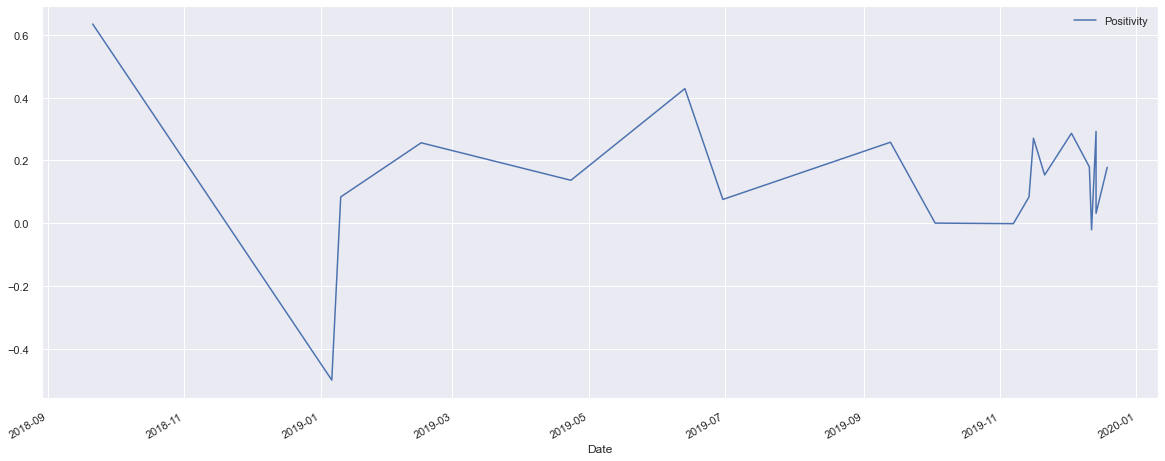

In [30]:
#Time series
stor_ts = stor.plot(x='Date', y='Positivity')

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1286771051.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


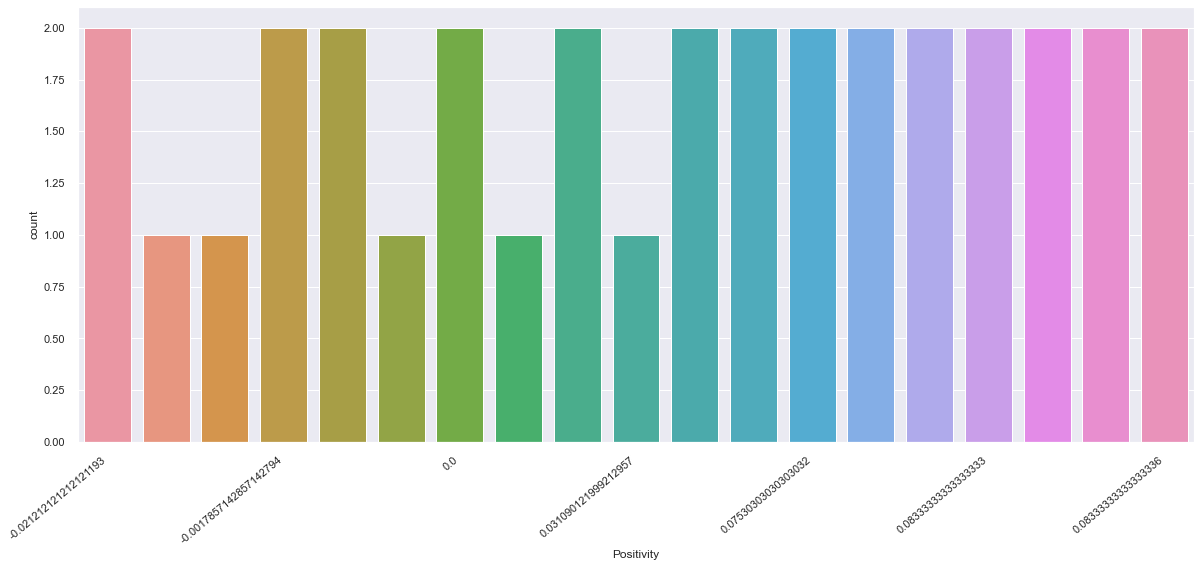

In [31]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

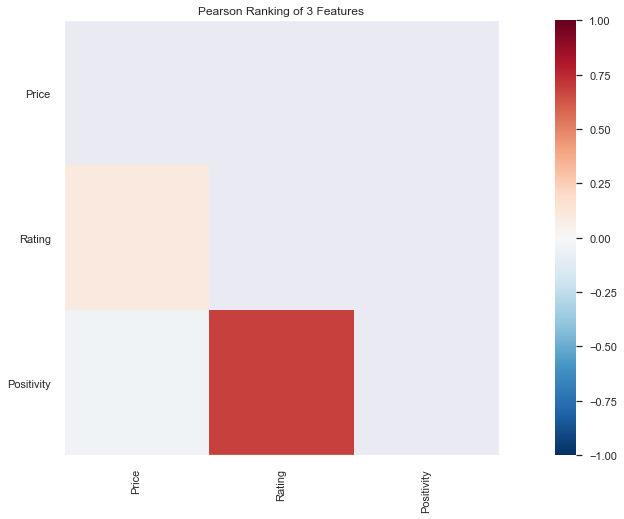

In [32]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = stor[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/stor.png") # Draw/show/poof the data

In [33]:
#R2 info
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.6868928796477124
Probability is:
1.0121695716791799e-05


In [34]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Topic'] = 'Software'
soft.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/3954275882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft['Score'] = soft['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/3954275882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/3954275882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Item #                                                          Model  \
4   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
6   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
16  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
17  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
4   749.99       1 2019-04-16   
6   749.99       5 2018-12-31   
8   749.99       1 2019-04-08   
16  749.99       1 2018-12-15   
17  749.99       2 2019-01-02   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review  \
4   purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could   
6                                                                                                                                                                                          soy de costa rica compr el x de 256 la verdad estaba algo nervioso por ser reconstruido pero lo recibo un dia ant de lo previsto considero que est es el mejor negocio que se pued hacer la bateria esta al 100 pantalla intacta funciona de maravilla es como comprarlo nuevo de appl   
8                                                                                                                                                                                phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
16                                                                                                                                                                                                                                                                                                 screen iphon lot scratch remov screen protector seller put found poor state screen refurbish mean product renew screen without scratch would much appreci given high price tag   
17                                                                                                                                                                                                                                                                    got phone came sketchi box charger paper funki wrap around got bare charg charg setup got halfway threw set turn black said hot function defiantli hot disappoint set nice phone get repetit problem refund   

                                         Score  Positivity     Topic  
4   (-0.18528138528138527, 0.6720779220779222)   -0.185281  Software  
6                                   (0.0, 0.0)    0.000000  Software  
8   (0.15555555555555556, 0.31527777777777777)    0.155556  Software  
16            (-0.08812499999999998, 0.506875)   -0.088125  Software  
17   (0.19666666666666668, 0.6466666666666667)    0.196667  Software

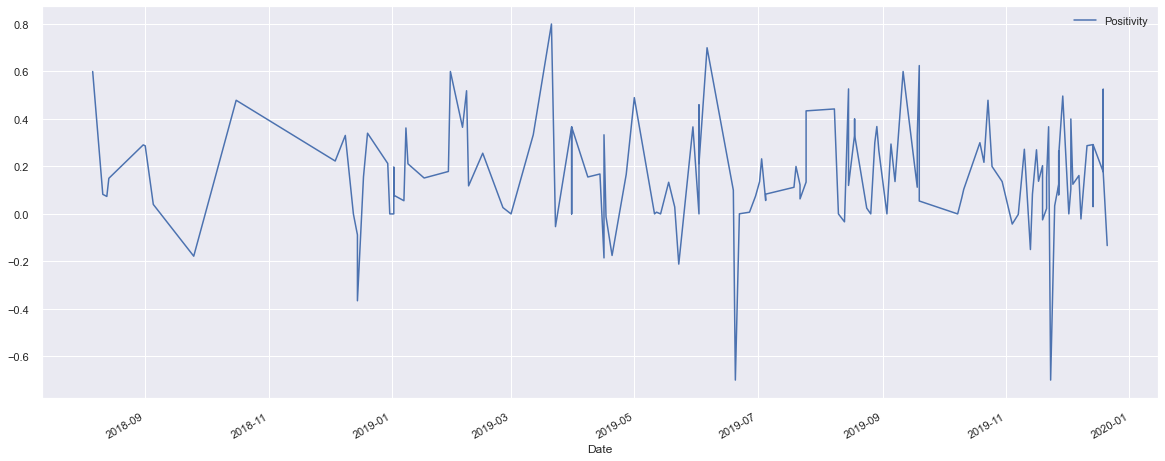

In [35]:
#Time series
soft_ts = soft.plot(x='Date', y='Positivity')

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1209118829.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


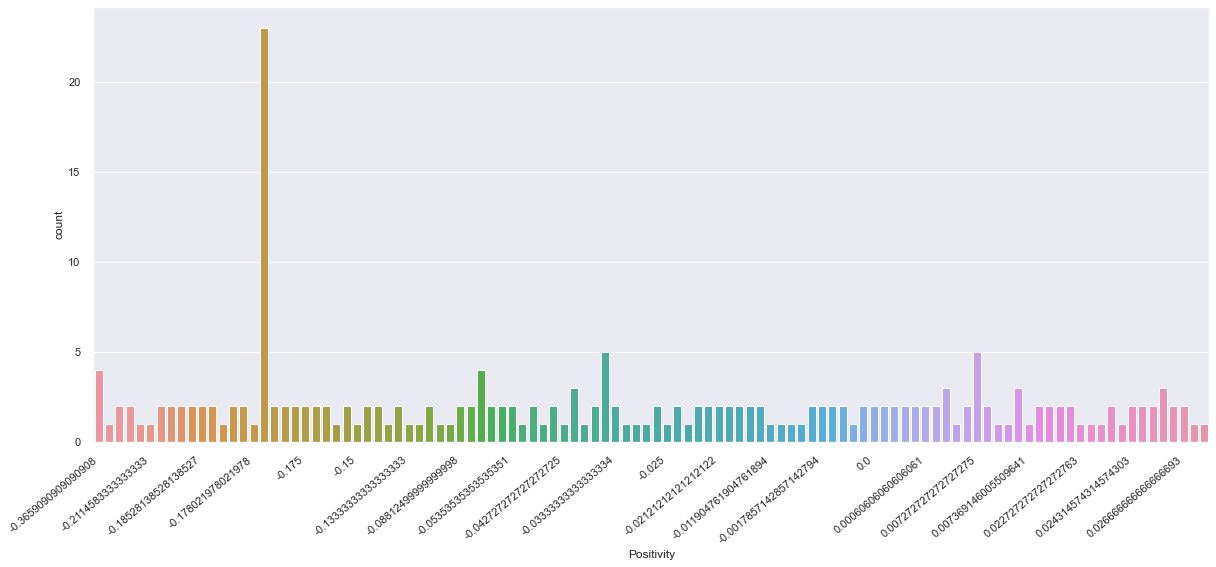

In [36]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

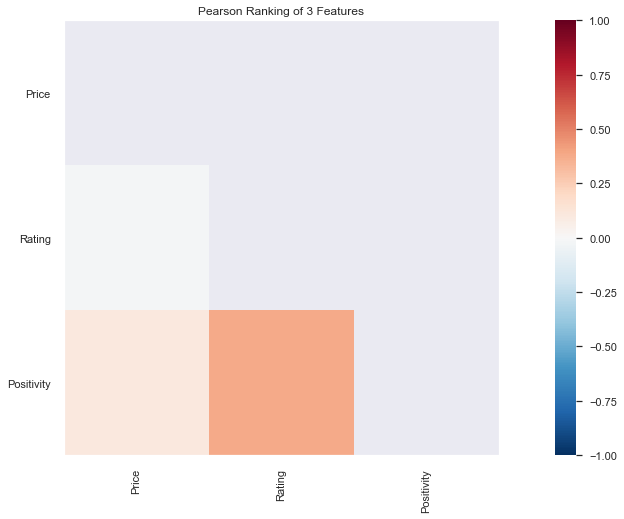

In [37]:
num_features = ['Price', 'Rating', 'Positivity']
X = soft[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/soft.png") # Draw/show/poof the data

In [38]:
#R2 info
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.3773781371440641
Probability is:
1.1043466015637111e-08


In [39]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Topic'] = 'Music'
musi.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/990020117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musi['Score'] = musi['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/990020117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/990020117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Item #                                                          Model  \
19  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
20  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
35  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
45  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
55  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
19  749.99       5 2019-11-08   
20  749.99       3 2019-07-25   
35  749.99       2 2018-10-09   
45  749.99       5 2019-08-08   
55  749.99       5 2019-06-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
19                                                                 phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review mention turn camera click problem issu get set servic provid sprint consid buy phone base review consid thing hundr dollar cheaper buy one new amazon return servic impecc worst come worst return get anoth one also consid fact averag roughli 10 peopl even bother write amazon review major peopl leav 1 star review probabl written review everyth check like phone almost forgot write review consid fact major review gave phone 5 star begin see interest save money excel rout like go much better money   
20  phone arriv right time great condit charger includ work great howev think phone must korea japan appar illeg take digit photo without audibl shutter click absolut way turn sound even phone mute volum turn way happen everi major applic use camera art student take ton pictur camera primari reason got iphon x took multipl store told either return phone jailbreak rewrit line code affect featur jailbreak void warranti servic appl offer return big hiccup work around take pictur wed librari quiet set ideal make sure countri origin taken consider sell someon product go major featur differ tldr nice phone great condit good price came time particular phone unus anyon like take pictur   
35                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            get hot listen music watch video   
45                                                                                                                                                                                                                                                                                                  incred satisfi phone came perfect condit 80 batteri life upon arriv phone sync devic smoothli sim card immedi work put phone came scratch look brand new think worth photo great storag 64g like order came adapt phone charger siim tray eject updat two day later found coul

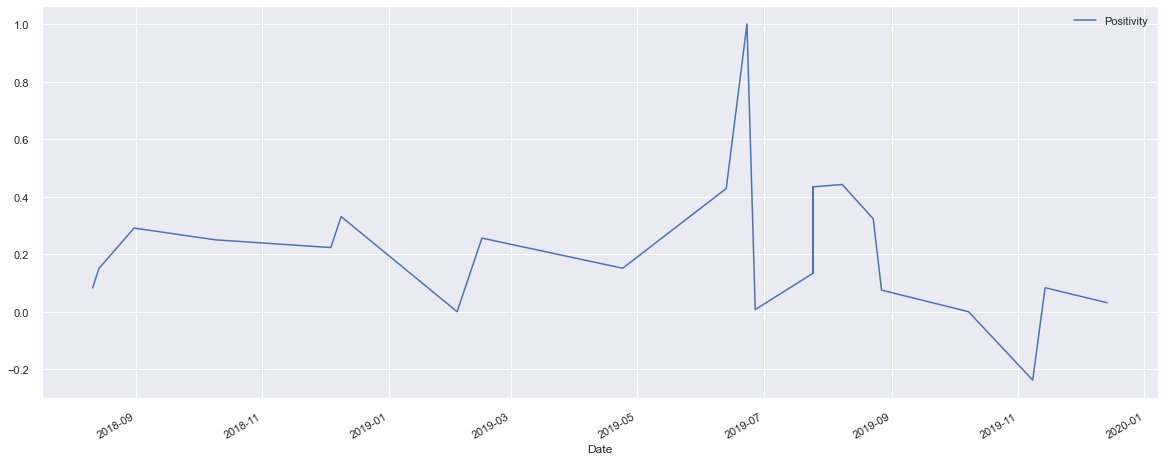

In [40]:
#Time series
musi_ts = musi.plot(x='Date', y='Positivity')

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/2386641243.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


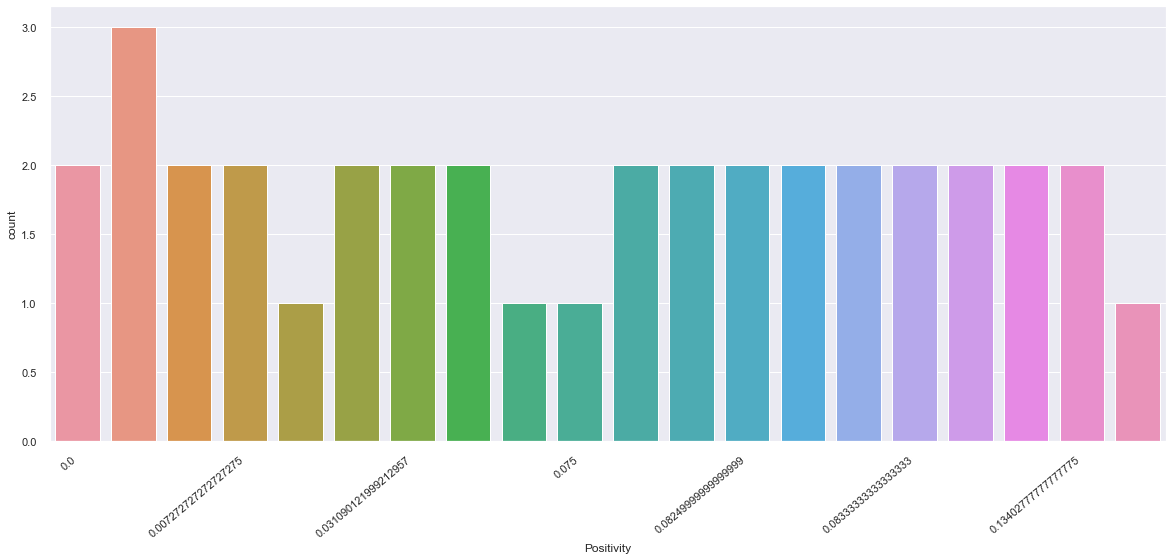

In [41]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

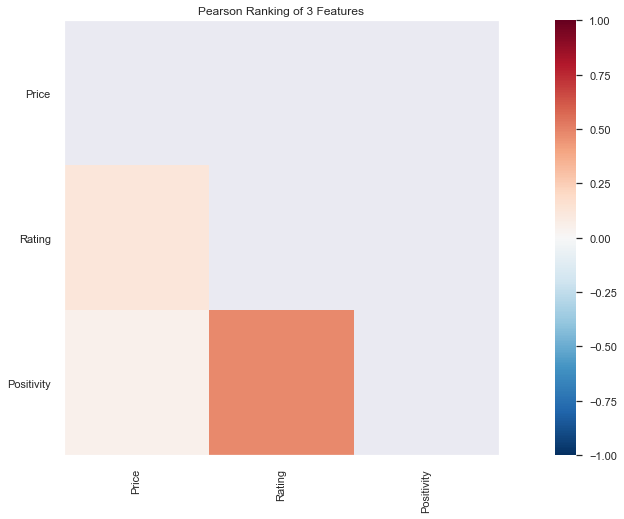

In [42]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = musi[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/musi.png") # Draw/show/poof the data

In [43]:
#R2 info
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.4769872999917155
Probability is:
0.0028365759129784706


In [44]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Topic'] = 'Screen'
scre.head()

/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/4204929618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scre['Score'] = scre['Review'].apply(ss)
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/4204929618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/4204929618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Item #                                                          Model  \
0   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
7   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
14  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
0   749.99       1 2018-11-07   
3   749.99       1 2019-01-08   
7   749.99       5 2018-10-23   
8   749.99       1 2019-04-08   
14  749.99       3 2018-12-08   

                                                                                                                                                                                                                                                                                              Review  \
0                                                                                                                                                                                                                                                              screen crack phone turn 24 hour charg   
3                                                                                                                                                                  product fals label unlock 4 week sinc inform phone still lock get excus plu phone came realli bad condit mani scratch see clearli   
7                                                                                                                                                                                                                                   phone basic new everyth work scratch anyth fast deliveri satisfi   
8   phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
14                                                                                                                                                                                                        devic support lte plu poor hous box arriv thing work fine breakdown price necessari receiv   

                                         Score  Positivity   Topic  
0                                   (0.0, 0.0)    0.000000  Screen  
3    (-0.6999999999999998, 0.6666666666666666)   -0.700000  Screen  
7   (0.11212121212121212, 0.39318181818181824)    0.112121  Screen  
8   (0.15555555555555556, 0.31527777777777777)    0.155556  Screen  
14                (0.008333333333333331, 0.55)    0.008333  Screen

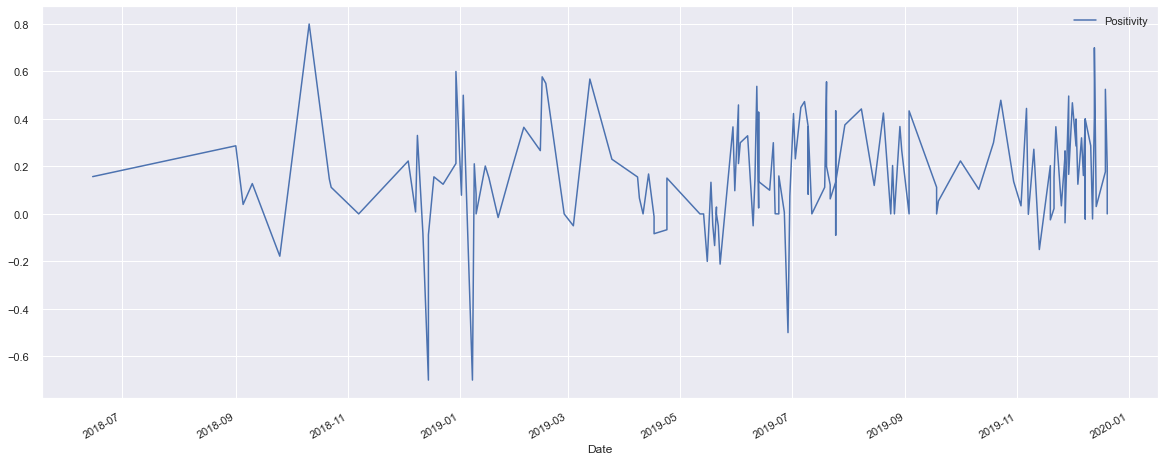

In [45]:
#Time series
scre_ts = scre.plot(x='Date', y='Positivity')

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/704352520.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


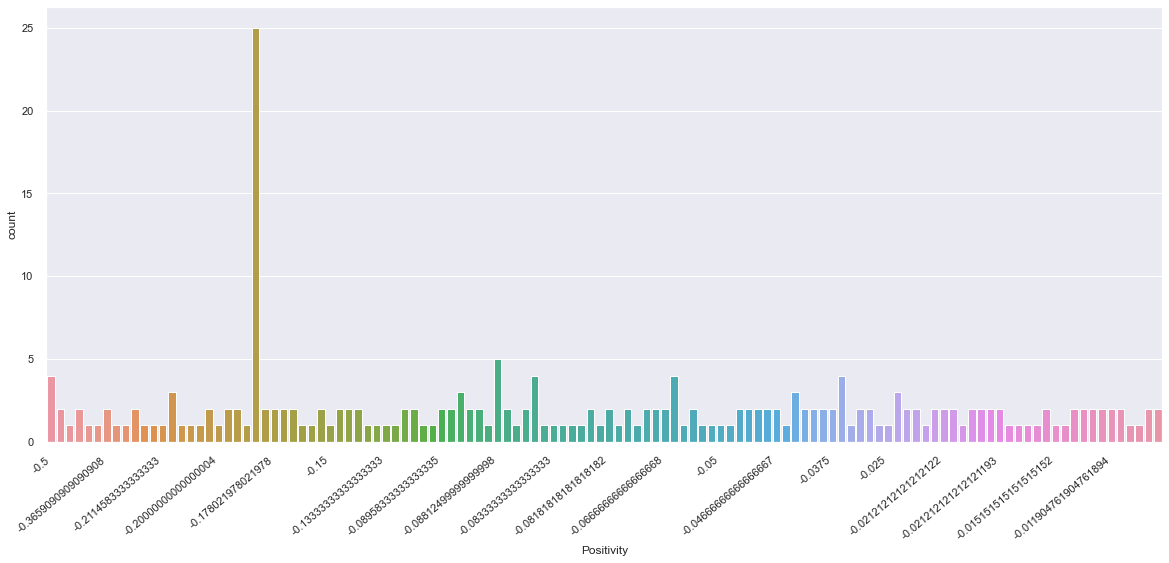

In [46]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 6
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

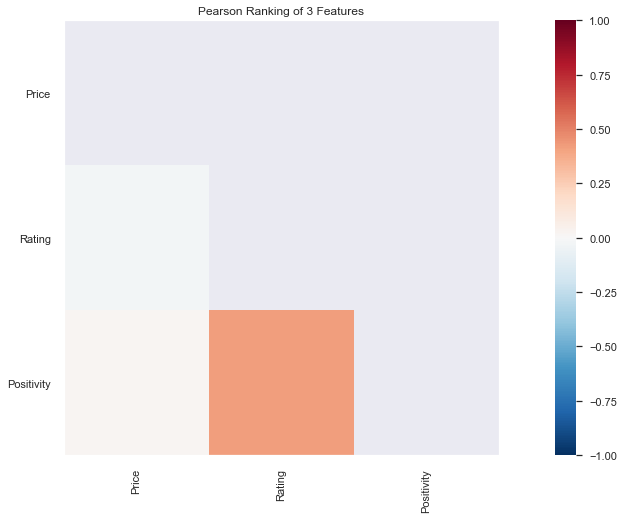

In [47]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = scre[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/scre.png") # Draw/show/poof the data

In [48]:
#R2 info
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.4188954879265039
Probability is:
4.6527993203220594e-11


In [49]:
#Merging the dataframes into one..
a_df = [batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

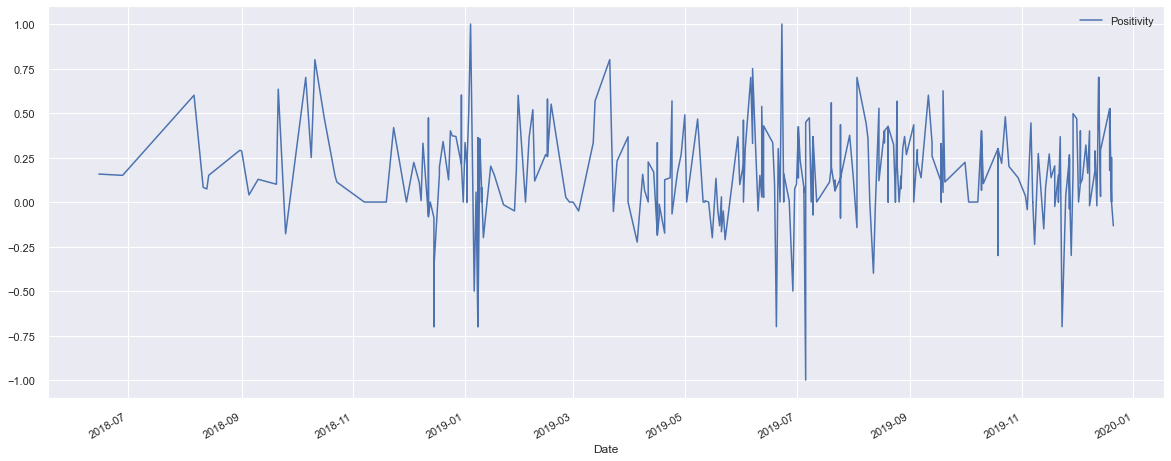

In [50]:
#Time series info
a_df_ts = a_df.plot(x='Date', y='Positivity')

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

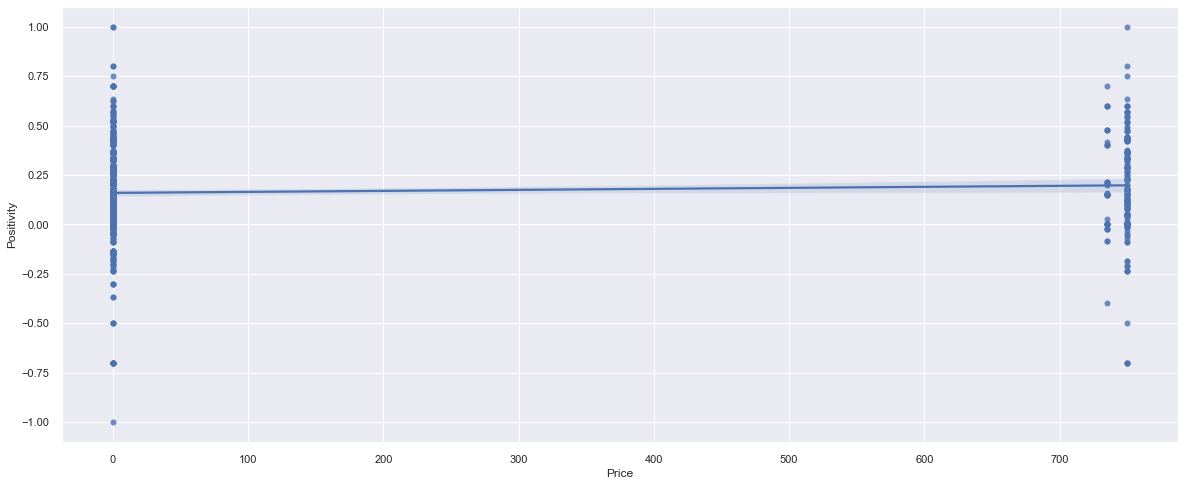

In [51]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

/Users/anjanibonda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0c/spq36xkd5vz7k9940sd5prhw0000gn/T/ipykernel_79179/1237994794.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


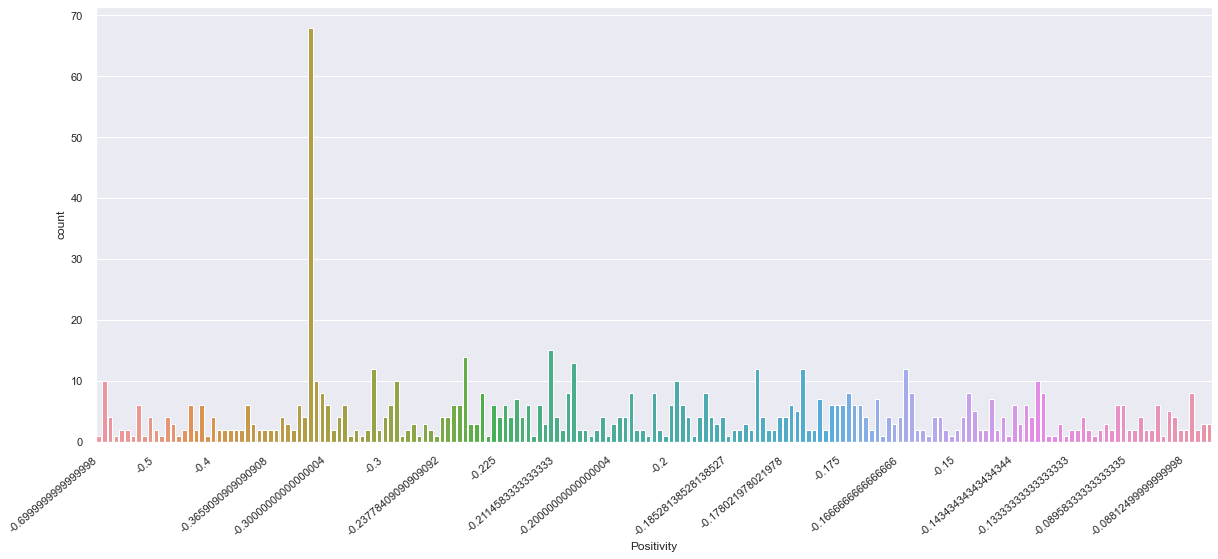

In [52]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

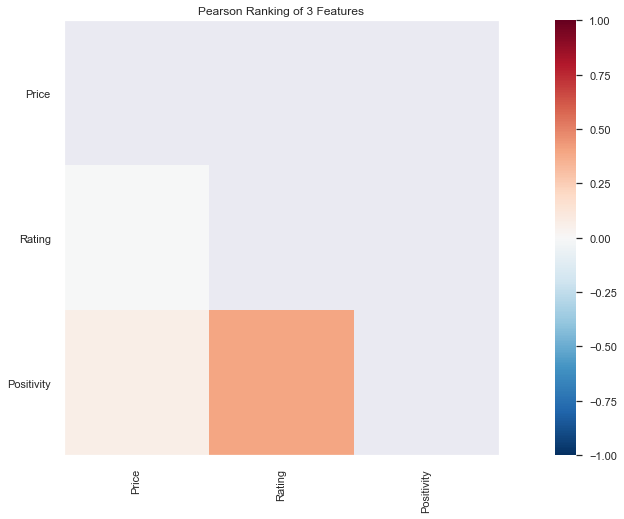

In [53]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = a_df[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/anjanibonda/Data-Science/adf.png") # Draw/show/poof the data

In [54]:
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical])
a_df_cat.head()

Topic_Battery  Topic_Camera  Topic_Music  Topic_Screen  Topic_Software  \
0              1             0            0             0               0   
1              1             0            0             0               0   
2              1             0            0             0               0   
3              1             0            0             0               0   
4              1             0            0             0               0   

   Topic_Speed  Topic_Storage  Item #_B0775451TT  Item #_B077578W38  \
0            0              0                  1                  0   
1            0              0                  1                  0   
2            0              0                  1                  0   
3            0              0                  1                  0   
4            0              0                  1                  0   

   Item #_B0775H5HJW  Item #_B07D6TQP6F  Item #_B07KFNRQ5S  Item #_B07KKL5KGG  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07P6Y8L3F  Item #_B07RDMLR4V  Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0

In [55]:
#Listing the columns
list(a_df_cat.columns)

['Topic_Battery',
 'Topic_Camera',
 'Topic_Music',
 'Topic_Screen',
 'Topic_Software',
 'Topic_Speed',
 'Topic_Storage',
 'Item #_B0775451TT',
 'Item #_B077578W38',
 'Item #_B0775H5HJW',
 'Item #_B07D6TQP6F',
 'Item #_B07KFNRQ5S',
 'Item #_B07KKL5KGG',
 'Item #_B07P6Y8L3F',
 'Item #_B07RDMLR4V',
 'Item #_B07RKYQSRB',
 'Item #_B07RT1X4FJ']

In [56]:
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

In [57]:
#Reviewing the new dataset
a_df.head()

index      Item #  \
0      4  B0775451TT   
1      5  B0775451TT   
2      8  B0775451TT   
3     17  B0775451TT   
4     19  B0775451TT   

                                                           Model   Price  \
0  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
1  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
2  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
3  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
4  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   

   Rating       Date  \
0       1 2019-04-16   
1       5 2018-12-12   
2       1 2019-04-08   
3       2 2019-01-02   
4       5 2019-11-08   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
0                                                                                                                                                                purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          love new phone look work everyth work batteri life 94 good glad purchas definit recommend buy skeptic buy product definit worth buy look good phone   
2                                                                                                                                                                                                                                                                                                                                             phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
3                                                                                                                                                                                                                                                                                                                                                                                                                                  got phone came sketchi box charger paper funki wrap around got bare charg charg setup got halfway threw set turn black said hot function defiantli hot disappoint set nice phone get repetit problem refund   
4  phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review m

In [58]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
a_df.head()

Price  Rating       Date                                       Score  \
0  749.99       1 2019-04-16  (-0.18528138528138527, 0.6720779220779222)   
1  749.99       5 2018-12-12   (0.47272727272727266, 0.5590909090909091)   
2  749.99       1 2019-04-08  (0.15555555555555556, 0.31527777777777777)   
3  749.99       2 2019-01-02   (0.19666666666666668, 0.6466666666666667)   
4  749.99       5 2019-11-08  (-0.23778409090909092, 0.6761363636363636)   

   Positivity  Topic_Battery  Topic_Camera  Topic_Music  Topic_Screen  \
0   -0.185281              1             0            0             0   
1    0.472727              1             0            0             0   
2    0.155556              1             0            0             0   
3    0.196667              1             0            0             0   
4   -0.237784              1             0            0             0   

   Topic_Software  ...  Item #_B0775451TT  Item #_B077578W38  \
0               0  ...                  1                  0   
1               0  ...                  1                  0   
2               0  ...                  1                  0   
3               0  ...                  1                  0   
4               0  ...                  1                  0   

   Item #_B0775H5HJW  Item #_B07D6TQP6F  Item #_B07KFNRQ5S  Item #_B07KKL5KGG  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07P6Y8L3F  Item #_B07RDMLR4V  Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0  

[5 rows x 22 columns]

In [59]:
#Creating a list and looping through to format.
a_df_list = ['Item #_B0775451TT','Item #_B077578W38','Item #_B0775H5HJW','Item #_B07D6TQP6F','Item #_B07KFNRQ5S',
'Item #_B07KKL5KGG','Item #_B07P6Y8L3F','Item #_B07RDMLR4V','Item #_B07RKYQSRB','Item #_B07RT1X4FJ','Topic_Battery',
'Topic_Camera','Topic_Music','Topic_Screen','Topic_Software','Topic_Speed','Topic_Storage']
for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [60]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [61]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Item #_B0775451TT: 0.02701984059421914
Item #_B077578W38: -0.04239732373072482
Item #_B0775H5HJW: 0.022608428302031396
Item #_B07D6TQP6F: 0.027019840594219136
Item #_B07KFNRQ5S: -0.0008782082214486713
Item #_B07KKL5KGG: -0.03558173723917193
Item #_B07P6Y8L3F: -0.049891145592876274
Item #_B07RDMLR4V: -0.000878208221448701
Item #_B07RKYQSRB: 0.08856025075437265
Item #_B07RT1X4FJ: -0.03558173723917191
Topic_Battery: 0.043167610261870035
Topic_Camera: -0.04529190086429303
Topic_Music: 0.027206198412053444
Topic_Screen: -0.009670656185069905
Topic_Software: -0.019496627961484554
Topic_Speed: 0.01782293332554234
Topic_Storage: -0.013737556988618432


In [63]:
LR = LogisticRegression(a_df_list)
LR

LogisticRegression(penalty=['Item #_B0775451TT', 'Item #_B077578W38',
                            'Item #_B0775H5HJW', 'Item #_B07D6TQP6F',
                            'Item #_B07KFNRQ5S', 'Item #_B07KKL5KGG',
                            'Item #_B07P6Y8L3F', 'Item #_B07RDMLR4V',
                            'Item #_B07RKYQSRB', 'Item #_B07RT1X4FJ',
                            'Topic_Battery', 'Topic_Camera', 'Topic_Music',
                            'Topic_Screen', 'Topic_Software', 'Topic_Speed',
                            'Topic_Storage'])